# Notebook to demonstrate the climate tools available
#  Based on data retreived via the cdsapi, you will need a cdsapi key to download the data

In [2]:
# Imports
import os
import xarray as xr
import numpy as np
import cdsapi
import matplotlib.pyplot as plt

from copy import deepcopy

import coucal

In [3]:
# Create directories 
if not os.path.isdir('test_data'): os.mkdir('test_data')

# set constants
YEARS = [2015]

In [4]:
# Download 5 years of hourly ERA5 data for europe
c = cdsapi.Client()
out_fnames = []
for year in YEARS:
    out_fnames += [f"test_data/era5_temperature_europe_{year}.grib"]
    if not os.path.isfile(out_fnames[-1]):
        c.retrieve(
            'reanalysis-era5-single-levels',
            {
                'product_type': 'reanalysis',
                'variable': '2m_temperature',
                'year': year,
                'month': [
                    '01', '02', '03',
                    '04', '05', '06',
                    '07', '08', '09',
                    '10', '11', '12',
                ],
                'day': [
                    '01', '02', '03',
                    '04', '05', '06',
                    '07', '08', '09',
                    '10', '11', '12',
                    '13', '14', '15',
                    '16', '17', '18',
                    '19', '20', '21',
                    '22', '23', '24',
                    '25', '26', '27',
                    '28', '29', '30',
                    '31',
                ],
                'time': [
                    '00:00', '06:00', '12:00', '18:00',
                ],
                'area': [
                    80, -10, 30, 60,
                ],
                'format': 'grib',
            },
        ).download(target=out_fnames[-1])



In [5]:
# Open data in xarray
t2m_data_in = xr.open_mfdataset(out_fnames, chunks={'time':48})

t2m_data = t2m_data_in.isel(latitude=100,longitude=100)
t2m_data

<xarray.Dataset>
Dimensions:     (time: 1460)
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 2015-01-01 ... 2015-12-31T18:00:00
    step        timedelta64[ns] ...
    surface     float64 ...
    latitude    float64 55.0
    longitude   float64 15.0
    valid_time  (time) datetime64[ns] dask.array<chunksize=(48,), meta=np.ndarray>
Data variables:
    t2m         (time) float32 dask.array<chunksize=(48,), meta=np.ndarray>
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-11-28T09:19 GRIB to CDM+CF via cfgrib-0.9.1...

In [6]:
vivien_data = xr.open_dataset(
    '/Users/edwardcomyn-platt/Work/Test_Data/debugging/shapes.average/58f243ac-6e2d-4f78-bf95-4ea643813910.nc'
)
vivien_data

<xarray.Dataset>
Dimensions:      (time: 2, lat: 185, lon: 271)
Coordinates:
  * time         (time) datetime64[ns] 1959-01-01 1959-02-01
    realization  int64 ...
  * lat          (lat) float64 26.5 26.75 27.0 27.25 ... 71.75 72.0 72.25 72.5
  * lon          (lon) float64 -22.0 -21.75 -21.5 -21.25 ... 45.0 45.25 45.5
Data variables:
    t2m          (time, lat, lon) float32 ...
Attributes:
    Conventions:  CF-1.7
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      2022-09-05T14:39 GRIB to CDM+CF via cfgrib-0.9.9.1/ecCodes-...
    source:       ECMWF

In [7]:
mask = np.ones([len(vivien_data.lat), len(vivien_data.lon)])*np.nan
for i in range(50, 150):
    mask[i, i:i+40] = 1
shape_mask = deepcopy(vivien_data.t2m.rename('mask'))
shape_mask *= 0
shape_mask += 1
shape_mask *= mask
shape_mask_flat = shape_mask.isel(time=0, drop=True)
#
~np.isnan(shape_mask_flat)
# shape_mask_flat.plot()

<xarray.DataArray 'mask' (lat: 185, lon: 271)>
array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])
Coordinates:
    realization  int64 0
  * lat          (lat) float64 26.5 26.75 27.0 27.25 ... 71.75 72.0 72.25 72.5
  * lon          (lon) float64 -22.0 -21.75 -21.5 -21.25 ... 45.0 45.25 45.5
Attributes:
    long_name:              2 metre temperature
    units:                  K
    standard_name:          air_temperature
    comment:                derived from 3 hourly ERA5 reanalysis
    cds_magics_style_name:  near-surface-air-temperature
    type:                   real
    cache:                  3

[[[1.41612678 1.41612678 1.41612678 ... 1.41612678 1.41612678 1.41612678]
  [1.41303256 1.41303256 1.41303256 ... 1.41303256 1.41303256 1.41303256]
  [1.40991145 1.40991145 1.40991145 ... 1.40991145 1.40991145 1.40991145]
  ...
  [0.4889825  0.4889825  0.4889825  ... 0.4889825  0.4889825  0.4889825 ]
  [0.48241135 0.48241135 0.48241135 ... 0.48241135 0.48241135 0.48241135]
  [0.47583103 0.47583103 0.47583103 ... 0.47583103 0.47583103 0.47583103]]

 [[1.41612678 1.41612678 1.41612678 ... 1.41612678 1.41612678 1.41612678]
  [1.41303256 1.41303256 1.41303256 ... 1.41303256 1.41303256 1.41303256]
  [1.40991145 1.40991145 1.40991145 ... 1.40991145 1.40991145 1.40991145]
  ...
  [0.4889825  0.4889825  0.4889825  ... 0.4889825  0.4889825  0.4889825 ]
  [0.48241135 0.48241135 0.48241135 ... 0.48241135 0.48241135 0.48241135]
  [0.47583103 0.47583103 0.47583103 ... 0.47583103 0.47583103 0.47583103]]]
(1, 2) [2, 1, 1] (2,)


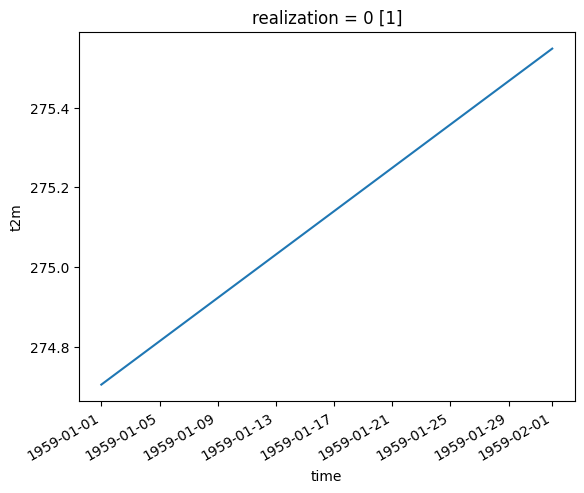

In [15]:
toy_data = vivien_data.t2m.where(
    ~np.isnan(shape_mask_flat), other=np.nan
)
toy_data

latitude_weights = coucal._options._latitude_weights(toy_data)
print(latitude_weights)
toy_red = toy_data.reduce(
    coucal._options.nanaverage, dim=['lat', 'lon'],
    weights = latitude_weights
)
toy_red.plot()
# toy_data.mean(dim='time').plot()
# weighted_mean = coucal.aggregate.reduce(
#     toy_data, how='nanaverage', how_weights='latitude',
#     dim=['latitude','longitude']
# )

In [ ]:
t2m_data.t2m.plot()

In [ ]:
t2m_rolling = coucal.aggregate.rolling_reduce(
    t2m_data, time=50, center=True, how_dropna='all'
)
t2m_rolling

In [ ]:
t2m_data.t2m.plot()
t2m_rolling.t2m.plot()

In [ ]:
coucal.aggregate.rolling_reduce(
    t2m_data_in, time=30, lat=5, lon=5, center=True,
    how_dropna='all'
)

In [ ]:
rolling_kwargs =  {'time': 50, 'center': True}
reduce_kwargs =  {}
data_rolling = t2m_data_in.rolling(**rolling_kwargs)
data_rolling

In [ ]:
coucal.aggregate.reduce(data_rolling).dropna('time', how='all')